In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import math

In [2]:
frame_list = pd.read_csv("../Webis-ArgRank-17-Dataset/argument-list.csv", delimiter=',')
frame_list.head(3)

,Argument ID,Conclusion ID,Conclusion Text,Number of Premises,Premise ID,Premise Text,Premise ID,Premise Text,Premise ID.1,Premise Text.1,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,2,they eyes too slanty and can't see they laws r...,1,1,To all those that are making this about a coun...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,I would say laying off Americans and moving th...,1,4,The new Indian Nazism The exact same thing tha...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6,a tweet is fundamentally valueless.,1,5,3.it's not valueless: the people in Iran prote...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
frame_unit = pd.read_csv("../Webis-ArgRank-17-Dataset/argument-unit-list.csv", delimiter=',')
frame_unit.head(3)

,Argument Unit ID,Argument Unit Text,Frequency,PageRank
0,1,To all those that are making this about a coun...,3,0.000058
1,2,they eyes too slanty and can't see they laws r...,12,0.000071
2,3,I would say laying off Americans and moving th...,1,0.000021


In [4]:
len(frame_list), len(frame_unit)

(17877, 31080)

In [5]:
len(set(list(frame_list['Conclusion ID'])))

13710

# Page 41 Figure (a)

In [6]:
counter = Counter(list(frame_list['Conclusion ID']))

counter_dict = {
        "1":0,
        "2":0,
        "3":0,
        "4":0,
        "5-9":0,
        "10-122":0
       }

for value in counter.values():
    if value == 1:
        counter_dict["1"] += 1
    elif value == 2:
        counter_dict["2"] += 1
    elif value == 3:
        counter_dict["3"] += 1
    elif value == 4:
        counter_dict["4"] += 1
    elif 5<=value<=9:
        counter_dict["5-9"] += 1
    elif 10<=value<=122:
        counter_dict["10-122"] += 1
        
counter_dict["0"] = len(frame_unit)-sum(counter_dict.values())

hist = {}

for key in ["0", "1", "2", "3", "4", "5-9", "10-122"]:
    hist[key] = counter_dict[key]
counter_dict

{'1': 11723,
 '2': 1243,
 '3': 362,
 '4': 176,
 '5-9': 165,
 '10-122': 41,
 '0': 17370}

In [7]:
counter_dict, sum(counter_dict.values())

({'1': 11723,
  '2': 1243,
  '3': 362,
  '4': 176,
  '5-9': 165,
  '10-122': 41,
  '0': 17370},
 31080)

<BarContainer object of 7 artists>

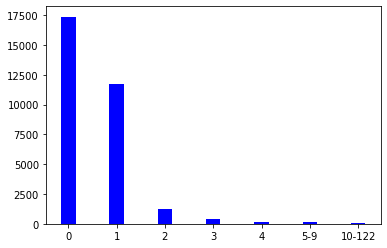

In [8]:
plt.bar(hist.keys(), hist.values(), 0.3, color='blue')

# Page 40 Figure (b)

In [9]:
counter2 = {}
for _, x in frame_list.iterrows():
    c_id = x['Conclusion ID']
    p_numbers = x['Number of Premises']
    if c_id not in counter2.keys():
        counter2[c_id] = p_numbers
    else:
        counter2[c_id] += p_numbers

In [10]:
counter_dict2 = {
        "1":0,
        "2":0,
        "3":0,
        "4":0,
        "5-9":0,
        "10-122":0
       }
for value in counter2.values():
    if value == 1:
        counter_dict2["1"] += 1
    elif value == 2:
        counter_dict2["2"] += 1
    elif value == 3:
        counter_dict2["3"] += 1
    elif value == 4:
        counter_dict2["4"] += 1
    elif 5<=value<=9:
        counter_dict2["5-9"] += 1
    elif 10<=value<=122:
        counter_dict2["10-122"] += 1

counter_dict2["0"] = len(frame_unit)-sum(counter_dict2.values())

hist2 = {}

for key in ["0", "1", "2", "3", "4", "5-9", "10-122"]:
    hist2[key] = counter_dict2[key]
counter_dict2

{'1': 10596,
 '2': 1849,
 '3': 662,
 '4': 287,
 '5-9': 266,
 '10-122': 50,
 '0': 17370}

In [11]:
counter_dict2, sum(counter_dict2.values())

({'1': 10596,
  '2': 1849,
  '3': 662,
  '4': 287,
  '5-9': 266,
  '10-122': 50,
  '0': 17370},
 31080)

<BarContainer object of 7 artists>

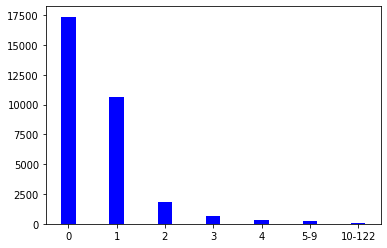

In [12]:
plt.bar(hist2.keys(), hist2.values(), 0.3, color='blue')

# Page 40 Figure (a)

In [13]:
counter3 = {}
for _, row in frame_list.iterrows():
    for premise_id in row[4:]:
        if type(premise_id) == int or type(premise_id) == float and not math.isnan(premise_id):
            if int(premise_id) not in counter3.keys():
                counter3[int(premise_id)] = 1
            else:
                counter3[int(premise_id)] += 1

In [14]:
counter_dict3 = {
        "1":0,
        "2":0,
        "3":0,
        "4":0,
        "5":0,
        "6-8":0
       }
for value in counter3.values():
    if value == 1:
        counter_dict3["1"] += 1
    elif value == 2:
        counter_dict3["2"] += 1
    elif value == 3:
        counter_dict3["3"] += 1
    elif value == 4:
        counter_dict3["4"] += 1
    elif value == 5:
        counter_dict3["5"] += 1
    elif 6<=value<=8:
        counter_dict3["6-8"] += 1

counter_dict3["0"] = len(frame_unit)-sum(counter_dict3.values())

hist3 = {}

for key in ["0", "1", "2", "3", "4", "5", "6-8"]:
    hist3[key] = counter_dict3[key]
counter_dict3

{'1': 17096, '2': 693, '3': 172, '4': 123, '5': 96, '6-8': 10, '0': 12890}

In [15]:
counter_dict3, sum(counter_dict3.values())

({'1': 17096, '2': 693, '3': 172, '4': 123, '5': 96, '6-8': 10, '0': 12890},
 31080)

<BarContainer object of 7 artists>

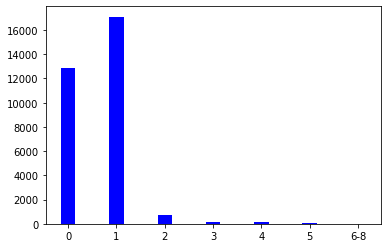

In [16]:
plt.bar(hist3.keys(), hist3.values(), 0.3, color='blue')

# Page 41 Figure (b)

In [17]:
hist4 = {
        "1":0,
        "2":0,
        "3":0,
        "4":0,
        "5":0,
        "6":0,
        "7-9":0
       }

for _, row in frame_list.iterrows():
    p_count = row["Number of Premises"]
    if p_count == 1:
        hist4["1"] += 1
    elif p_count == 2:
        hist4["2"] += 1
    elif p_count == 3:
        hist4["3"] += 1
    elif p_count == 4:
        hist4["4"] += 1
    elif p_count == 5:
        hist4["5"] += 1
    elif p_count == 6:
        hist4["6"] += 1
    elif 7 <= p_count <= 9:
        hist4["7-9"] += 1
    
hist4

{'1': 16244, '2': 1214, '3': 348, '4': 52, '5': 10, '6': 6, '7-9': 3}

In [18]:
hist4, sum(hist4.values()), len(frame_list)

({'1': 16244, '2': 1214, '3': 348, '4': 52, '5': 10, '6': 6, '7-9': 3},
 17877,
 17877)

<BarContainer object of 7 artists>

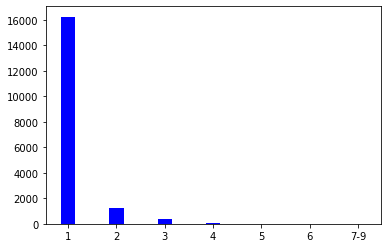

In [19]:
plt.bar(hist4.keys(), hist4.values(), 0.3, color='blue')

# Are there realy those 3113 conclusions participating in more then one argument?

In [20]:
n_conclusions = 0
for key in counter_dict2.keys():
    if key not in ['0', '1']:
        n_conclusions += counter_dict2[key]
n_conclusions

3114